In [795]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [796]:
titanic = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Datasets\Titanic.csv')

## About The Data

**1.** survival	  Survival	     0 = No, 1 = Yes

**2.** pclass	  Ticket class	 1 = 1st, 2 = 2nd, 3 = 3rd

**3.** sex	      Sex

**4.** Age	      Age in years

**5.** sibsp	# of siblings / spouses aboard the Titanic

**6.** parch	# of parents / children aboard the Titanic

**7.** ticket	Ticket number

**8.** fare	    Passenger fare

**9.** cabin	Cabin number

**10.** embarked    Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Note:**

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [797]:
titanic.shape

(891, 12)

In [798]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We don't need passengerid, ticket so we can drop them and the survived column is target so lets drop and survived column too

In [799]:
titanic.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

lets change name into surnames like mr, mrs, dr like so.

In [800]:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic.drop(['Name'], axis=1, inplace=True)

In [801]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


In [802]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [803]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Normalization

Since Age And Fare have a wide range of values we should apply min-max scalar or standard scalar to that columns.

In [804]:
# initialize standarscalar
scaler = StandardScaler()

# Apply Standardization to 'Age' and 'Fare' in both train and test datasets
titanic['Age'] = scaler.fit_transform(titanic[['Age']])
titanic['Fare'] = scaler.fit_transform(titanic[['Fare']])


In [805]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,7.140000e+02,891.000000,891.000000,8.910000e+02
mean,0.383838,2.308642,2.388379e-16,0.523008,0.381594,3.987333e-18
std,0.486592,0.836071,1.000701e+00,1.102743,0.806057,1.000562e+00
min,0.000000,1.000000,-2.016979e+00,0.000000,0.000000,-6.484217e-01
25%,0.000000,2.000000,-6.595416e-01,0.000000,0.000000,-4.891482e-01
50%,0.000000,3.000000,-1.170488e-01,0.000000,0.000000,-3.573909e-01
75%,1.000000,3.000000,5.718310e-01,1.000000,0.000000,-2.424635e-02
max,1.000000,3.000000,3.465126e+00,8.000000,6.000000,9.667167e+00


## Data Cleaning:

The process of cleaning data can be seen as both a part of and a precursor to Exploratory Data Analysis (EDA). Here's a more detailed explanation of how the two processes are interconnected:

**1. Initial Data Cleaning** Before diving into full-scale EDA, it's often necessary to perform some initial data cleaning to ensure that the data is in a workable state. This step may include:

**Removing Duplicates:** Ensure that there are no duplicate records.

**Handling Missing Values:** Identify and make preliminary decisions about how to handle missing values.

**Correcting Data Types:**Ensure that columns have the correct data types.

**Basic Validity Checks:** Check for any glaring errors or inconsistencies in the data (e.g., negative values for age).

**2. Exploratory Data Analysis (EDA):** Once the data is in a generally clean state, EDA can be performed. During EDA, you:

**Understand Distributions:** Look at the distributions of various features using histograms, box plots, etc.

**Identify Patterns and Relationships:** Use scatter plots, correlation matrices, and other techniques to understand relationships between features.

**Detect Anomalies and Outliers:** Identify any anomalies or outliers that may need further investigation or treatment.

**Generate Hypotheses:** Develop initial hypotheses about the data and potential predictive features.

**3. Further Data Cleaning and Feature Engineering:** Based on insights gained during EDA, further cleaning and transformations may be necessary:

**Handling Outliers:** Decide how to treat outliers (e.g., remove, transform).

**Addressing Missing Values:** Based on EDA insights, decide on the best strategy for handling missing values (e.g., imputation, deletion).

**Feature Engineering:** Create new features or transform existing ones based on the understanding developed during EDA.

**Encoding Categorical Variables**: Convert categorical variables into numerical formats (e.g., one-hot encoding).


In [806]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [807]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

Let's drop cabin column since the the cabin column has null values greater than the size of the dataset i.e more 50% are null values

Let's fill the null values of age with median and embarked with mode we used mode for embarked because embarked is categorical variable and we use mean and median for numerical variable we can use mean also for based on our insights from EDA.

In [808]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(['Cabin'], inplace=True, axis=1)

In [809]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [810]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,-0.530377,1,0,-0.502445,S,Mr
1,1,1,female,0.571831,1,0,0.786845,C,Mrs
2,1,3,female,-0.254825,0,0,-0.488854,S,Miss
3,1,1,female,0.365167,1,0,0.420730,S,Mrs
4,0,3,male,0.365167,0,0,-0.486337,S,Mr


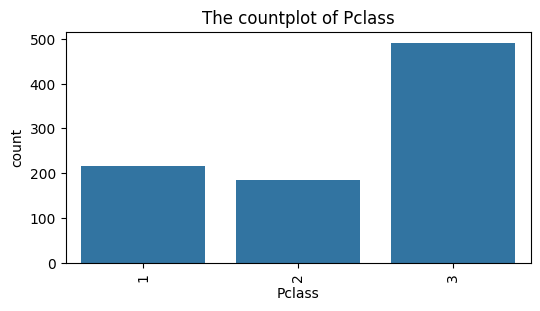

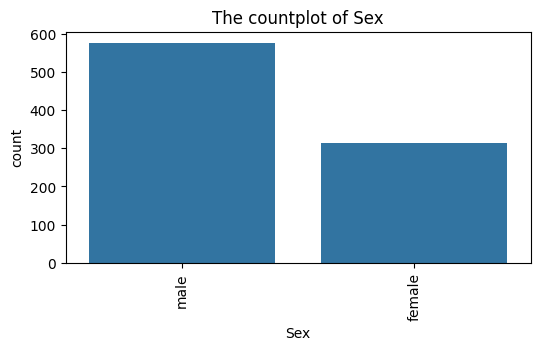

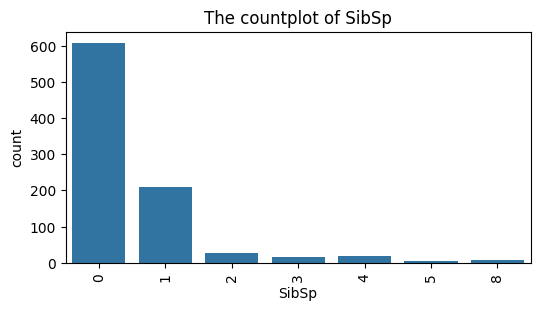

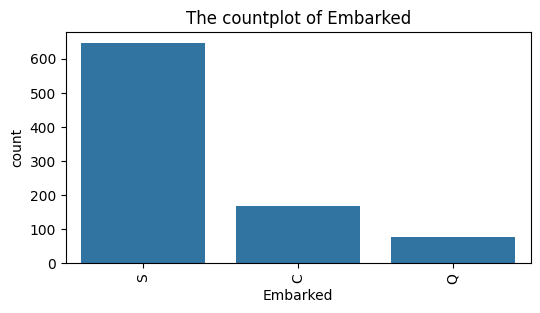

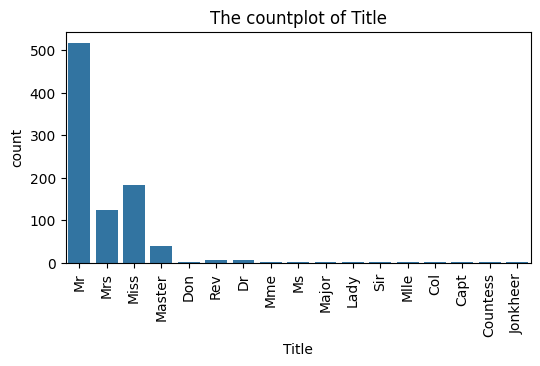

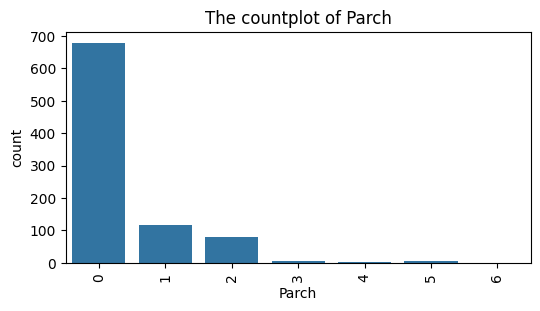

In [811]:
# List of features for which we want to create count plots
features = ['Pclass', 'Sex', 'SibSp', 'Embarked', 'Title', 'Parch']

# Loop through each feature in the list
for i, feature in enumerate(features):
    # Create a new figure with specified size
    plt.figure(figsize=(6, 3))
    
    # Create a count plot for the current feature
    sns.countplot(x=feature, data=titanic)
    
    # Set the title of the plot
    plt.title(f'The countplot of {feature}')
    
    # Rotate x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()

**Insights**

**1.** From 1st graph pclass has more count for 3.

**2.** From Sex graph Sex has more count for male.

**3.** From SibSp graph SibSp has more count for 0.

**4.** From Embarked graph Embarked has more count for s.

**5.** From Title graph Title has more count for Mr.

**6.** From Parch graph Parch has more count for 0.

In [812]:
# # Map 'Title' to numerical values
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5, 'Rev': 6, 'Col': 7, 'Major': 8, 'Mlle': 9, 'Countess': 10, 'Ms': 11, 'Lady': 12, 'Jonkheer': 13, 'Don': 14, 'Dona': 15, 'Mme': 16, 'Capt': 17, 'Sir': 18}
titanic['Title']=titanic['Title'].map(title_mapping)

# # Convert 'Sex' to numerical values
titanic.replace({'Sex':{'male':0,'female':1}},inplace=True)

# #convert embarked to numerical values
titanic.replace({'Embarked':{'C':1,'Q':0,'S':0}},inplace=True)

In [813]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,-0.530377,1,0,-0.502445,0,1
1,1,1,1,0.571831,1,0,0.786845,1,3
2,1,3,1,-0.254825,0,0,-0.488854,0,2
3,1,1,1,0.365167,1,0,0.420730,0,3
4,0,3,0,0.365167,0,0,-0.486337,0,1


C:\Users\Hp\AppData\Local\Temp\ipykernel_11552\588664659.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=titanic[column], shade=True, color='skyblue')  # Create density plot


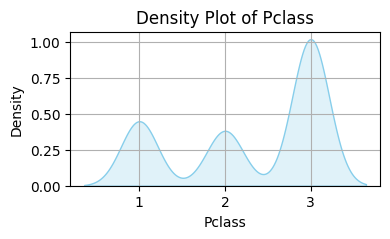

C:\Users\Hp\AppData\Local\Temp\ipykernel_11552\588664659.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=titanic[column], shade=True, color='skyblue')  # Create density plot


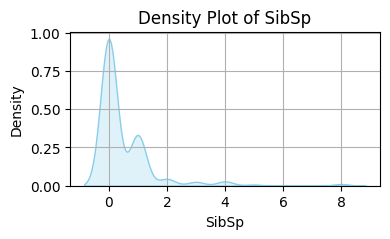

C:\Users\Hp\AppData\Local\Temp\ipykernel_11552\588664659.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=titanic[column], shade=True, color='skyblue')  # Create density plot


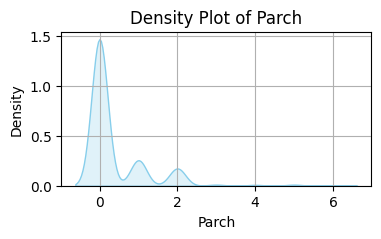

C:\Users\Hp\AppData\Local\Temp\ipykernel_11552\588664659.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=titanic[column], shade=True, color='skyblue')  # Create density plot


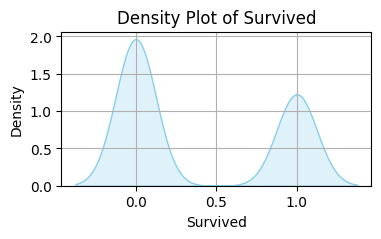

C:\Users\Hp\AppData\Local\Temp\ipykernel_11552\588664659.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=titanic[column], shade=True, color='skyblue')  # Create density plot


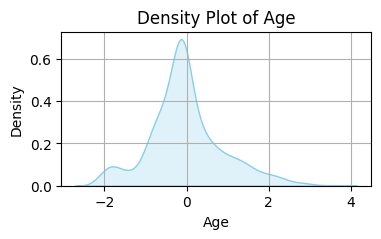

C:\Users\Hp\AppData\Local\Temp\ipykernel_11552\588664659.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=titanic[column], shade=True, color='skyblue')  # Create density plot


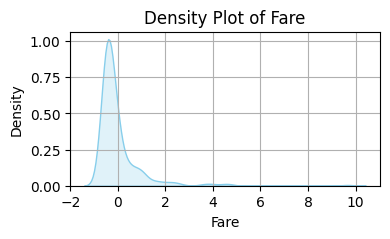

In [814]:
features = ['Pclass', 'SibSp', 'Parch', 'Survived', 'Age', 'Fare']

# Loop through each numeric column and create density plots
for column in features:
    plt.figure(figsize=(4, 2))  # Set the figure size
    sns.kdeplot(data=titanic[column], shade=True, color='skyblue')  # Create density plot
    plt.title(f'Density Plot of {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Density')  # Set the y-axis label
    plt.grid(True)  # Show grid
    plt.show()  # Display the density plot

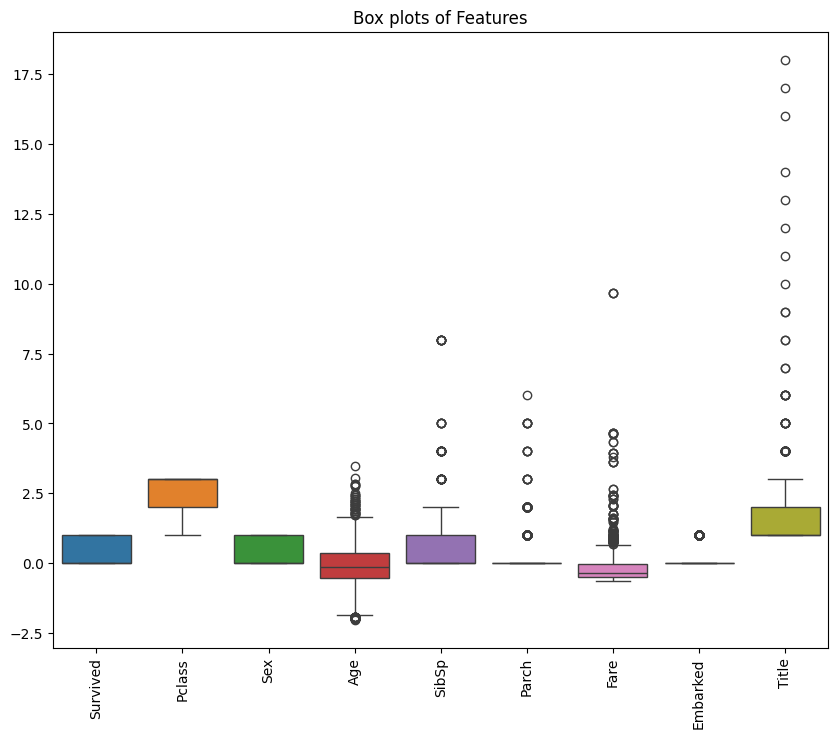

In [815]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=titanic)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

From the box plot we can say that Age, SibSp, Parch, Fare, Title, Embarked has outliers.

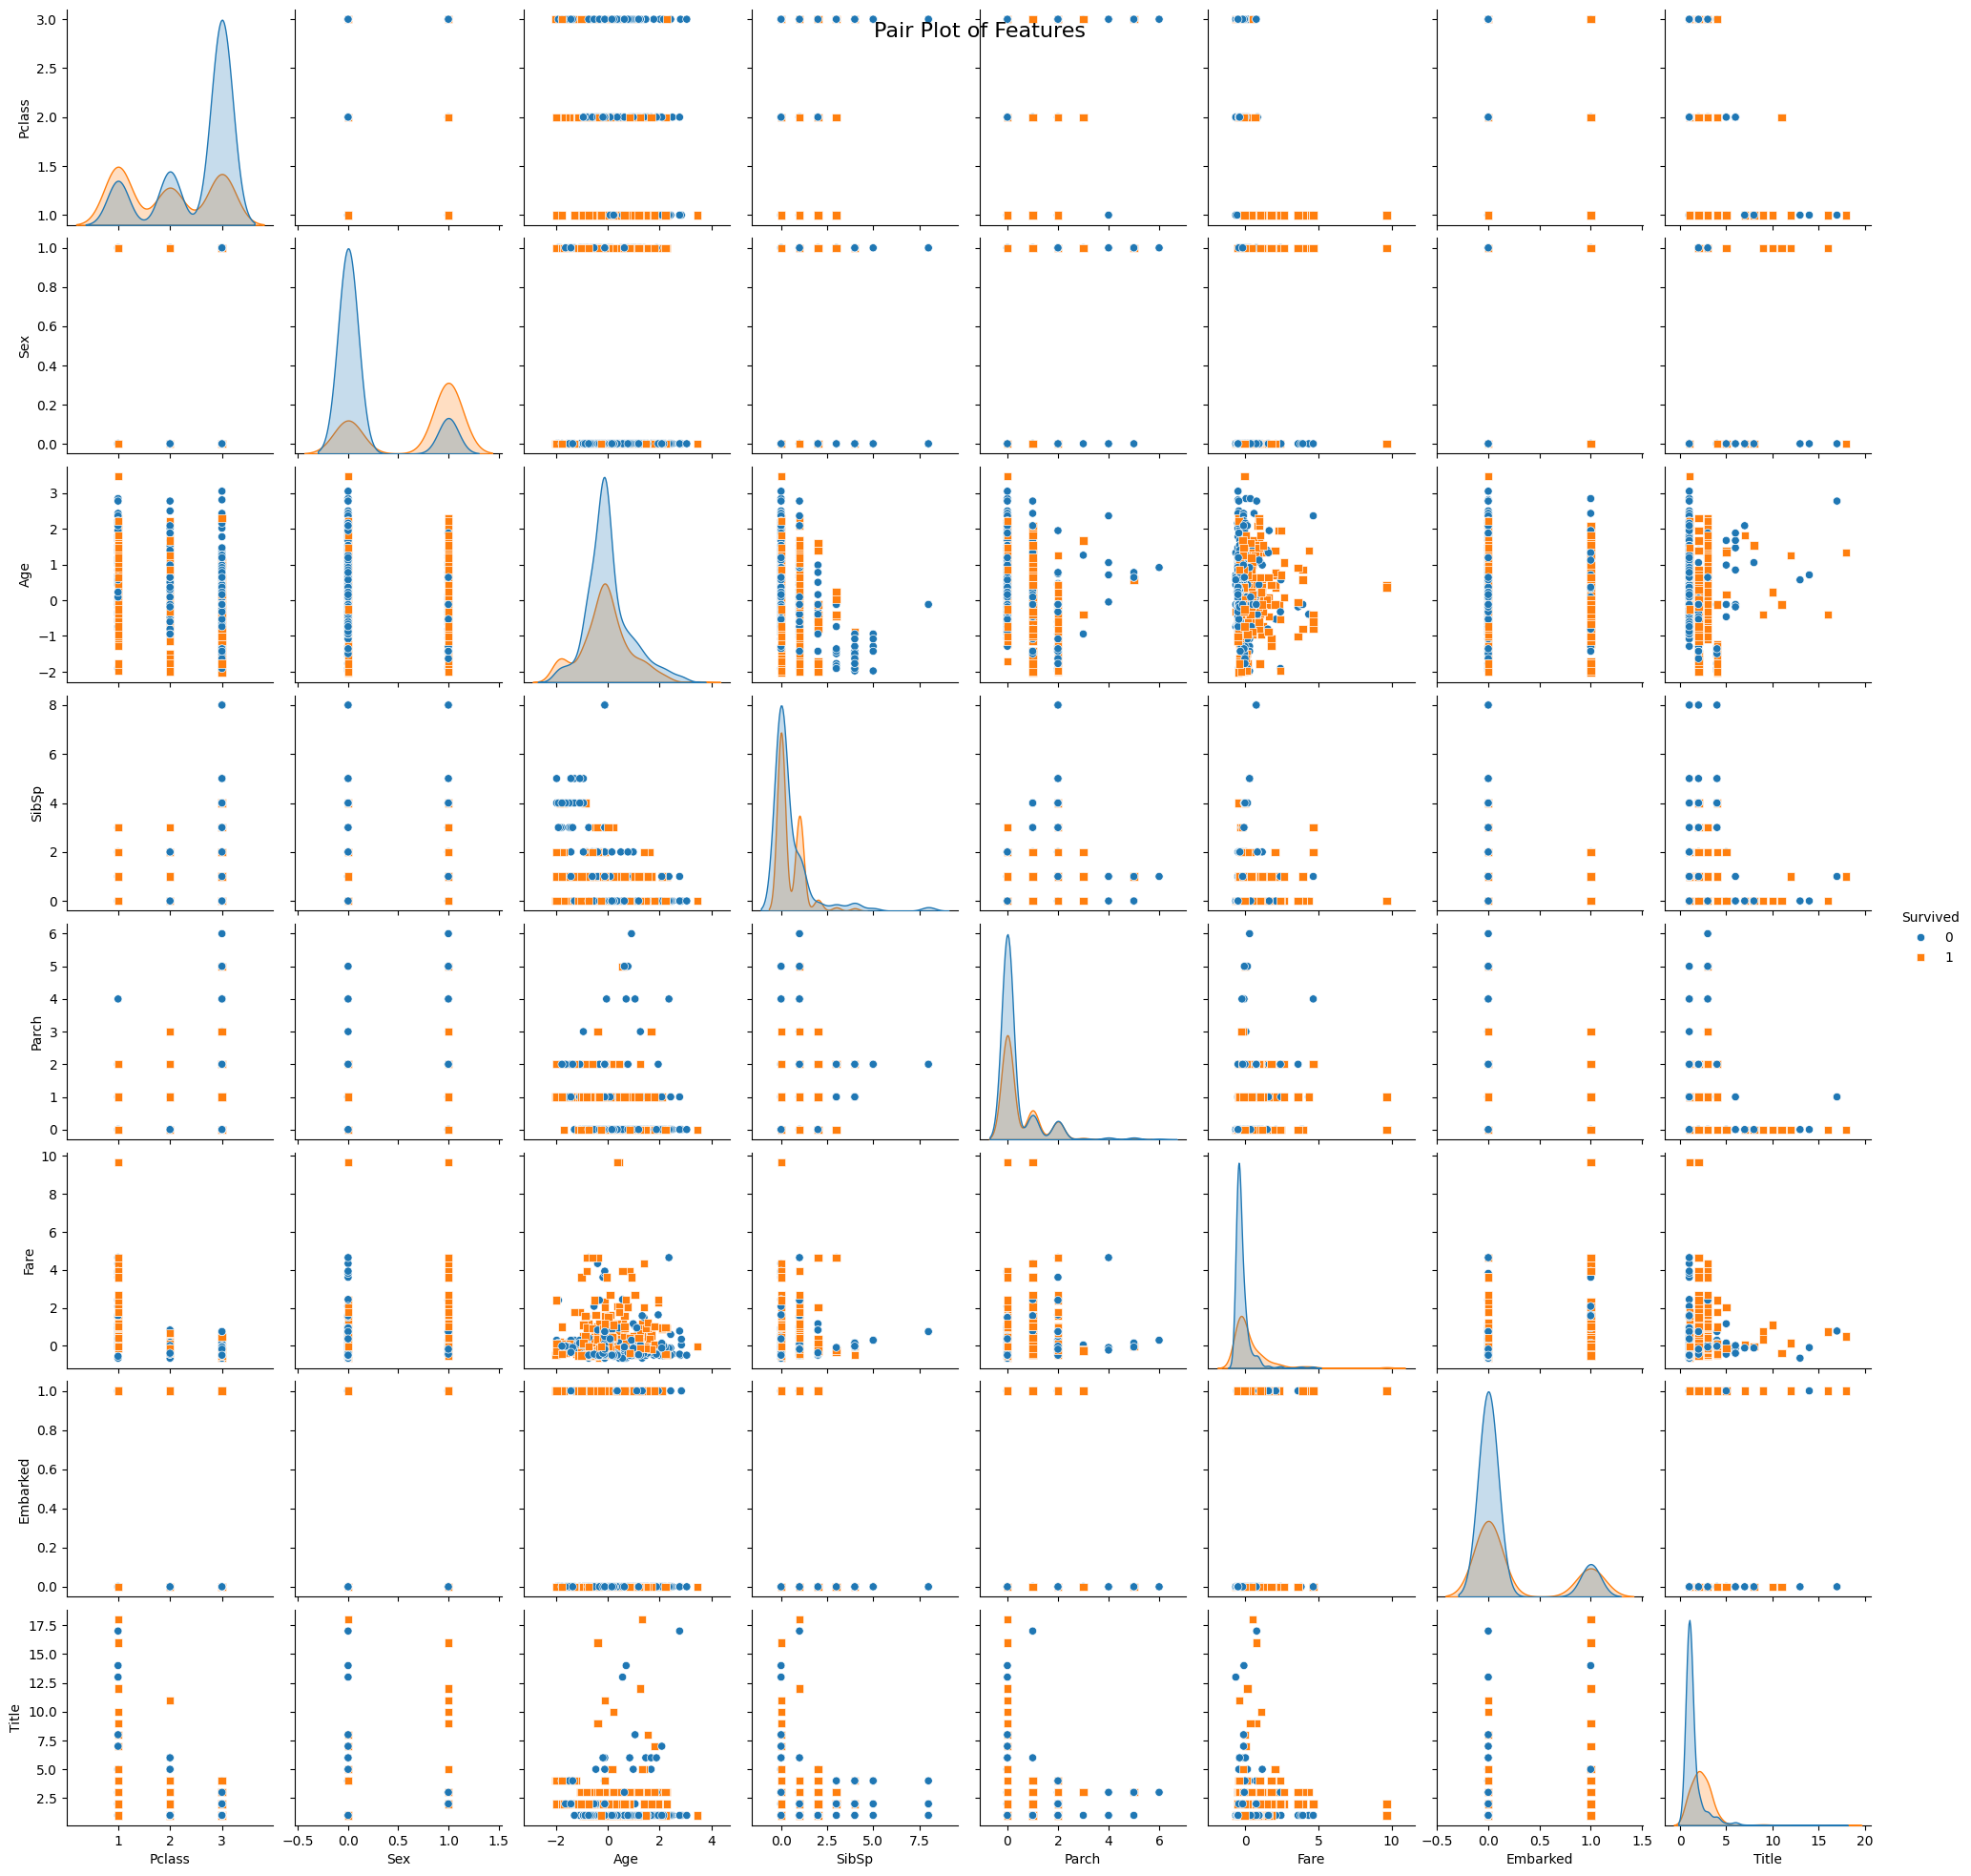

In [816]:
sns.pairplot(titanic, hue='Survived', markers=["o", "s"])
plt.suptitle('Pair Plot of Features', size=16)
plt.show()

We can observe that most of th eplots are parallel to either x-axis or y-axis.

**1.** Pclass doesnt depend on Age, SibSp, Fare, Parch. Though these values chages Pclass dont change.

**2.** Age doesnt depend on SibSp, Parch. It may depend somewhat on Fare.

**3.** Sibsp also doesnt depends on Fare, Parch.

**4.** Parch doesnt depend on Fare.

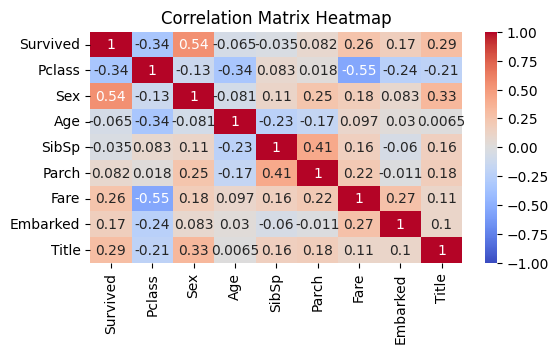

In [817]:
# Select numerical columns
numerical_columns = titanic.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the Heatmap we can say that Parch, Sex, Embarked, Title, Fare are corelated with survived.

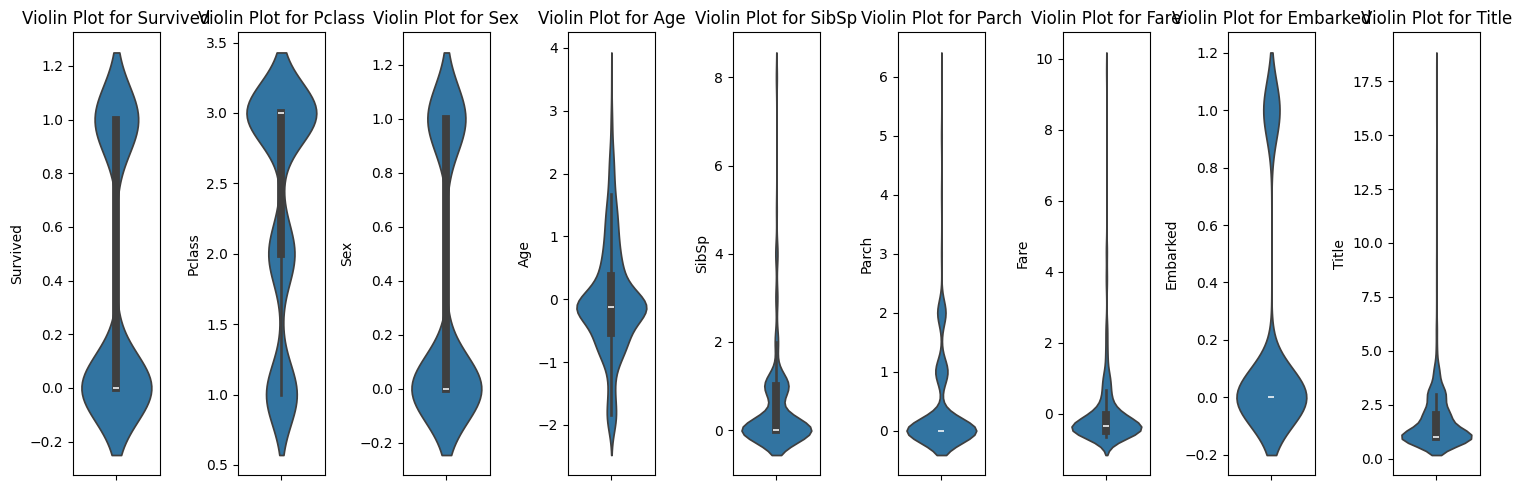

In [818]:
# Select numerical columns
numeric_columns = titanic.select_dtypes(include=['int64', 'float64']).columns

# Create violin plots for each numerical column
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.violinplot(y=titanic[column])
    plt.title(f'Violin Plot for {column}')

plt.tight_layout()
plt.show()

In [819]:
# Select numerical columns
numeric_columns = titanic.select_dtypes(include=['int64', 'float64']).columns

# Calculate Pearson's correlation coefficient for pairs of numerical features
for i, feature1 in enumerate(numeric_columns):
    for feature2 in numeric_columns[i + 1:]:
        corr_coefficient, p_value = pearsonr(titanic[feature1], titanic[feature2])
        print(f"Pearson's correlation coefficient between {feature1} and {feature2}: {corr_coefficient:.2f}")

Pearson's correlation coefficient between Survived and Pclass: -0.34
Pearson's correlation coefficient between Survived and Sex: 0.54
Pearson's correlation coefficient between Survived and Age: -0.06
Pearson's correlation coefficient between Survived and SibSp: -0.04
Pearson's correlation coefficient between Survived and Parch: 0.08
Pearson's correlation coefficient between Survived and Fare: 0.26
Pearson's correlation coefficient between Survived and Embarked: 0.17
Pearson's correlation coefficient between Survived and Title: 0.29
Pearson's correlation coefficient between Pclass and Sex: -0.13
Pearson's correlation coefficient between Pclass and Age: -0.34
Pearson's correlation coefficient between Pclass and SibSp: 0.08
Pearson's correlation coefficient between Pclass and Parch: 0.02
Pearson's correlation coefficient between Pclass and Fare: -0.55
Pearson's correlation coefficient between Pclass and Embarked: -0.24
Pearson's correlation coefficient between Pclass and Title: -0.21
Pear

Survived has positive linear relationship with Fare, Parch, Sex, Embarked, Title.

In [820]:
titanic['sibsp_parch_interaction'] = titanic['SibSp'] + titanic['Parch']
titanic['sex_age_interaction'] = titanic['Sex'] * titanic['Age']
titanic['fare_sex_interaction'] = titanic['Fare'] * titanic['Sex']
titanic['sex_title_interaction'] = titanic['Sex'] * titanic['Title']
titanic['fare_age_interaction'] = titanic['Fare'] * titanic['Age']
titanic['age_title_interaction'] = titanic['Age'] * titanic['Title']
titanic['fare_title_interaction'] = titanic['Fare'] * titanic['Title']
titanic['age_age_interaction'] = titanic['Age'] * titanic['Age']
titanic['fare_fare_interaction'] = titanic['Fare'] * titanic['Fare']
titanic['pclass_pclass_interaction'] = titanic['Pclass'] * titanic['Pclass']
titanic['age_fare_interaction'] = (titanic['Age'])**2 + (titanic['Fare'])**2

In [821]:
X = titanic.drop('Survived', axis=1)
y=titanic['Survived']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 Pclass                       0.039618
Sex                          0.078457
Age                          0.050380
SibSp                        0.022799
Parch                        0.010261
Fare                         0.071872
Embarked                     0.008436
Title                        0.091659
sibsp_parch_interaction      0.036200
sex_age_interaction          0.032135
fare_sex_interaction         0.056604
sex_title_interaction        0.075225
fare_age_interaction         0.070800
age_title_interaction        0.057592
fare_title_interaction       0.091430
age_age_interaction          0.044221
fare_fare_interaction        0.058813
pclass_pclass_interaction    0.031302
age_fare_interaction         0.072197
dtype: float64


In [822]:
titanic.drop(['SibSp', 'Parch', 'Embarked','Pclass','sibsp_parch_interaction','sex_age_interaction','age_age_interaction', 'pclass_pclass_interaction'], axis=1, inplace=True)

In [823]:
titanic.head()

,Survived,Sex,Age,Fare,Title,fare_sex_interaction,sex_title_interaction,fare_age_interaction,age_title_interaction,fare_title_interaction,fare_fare_interaction,age_fare_interaction
0,0,0,-0.530377,-0.502445,1,-0.000000,0,0.266485,-0.530377,-0.502445,0.252451,0.533751
1,1,1,0.571831,0.786845,3,0.786845,3,0.449943,1.715493,2.360536,0.619126,0.946116
2,1,1,-0.254825,-0.488854,2,-0.488854,2,0.124572,-0.509649,-0.977709,0.238978,0.303914
3,1,1,0.365167,0.420730,3,0.420730,3,0.153637,1.095501,1.262191,0.177014,0.310361
4,0,0,0.365167,-0.486337,1,-0.000000,0,-0.177594,0.365167,-0.486337,0.236524,0.369871


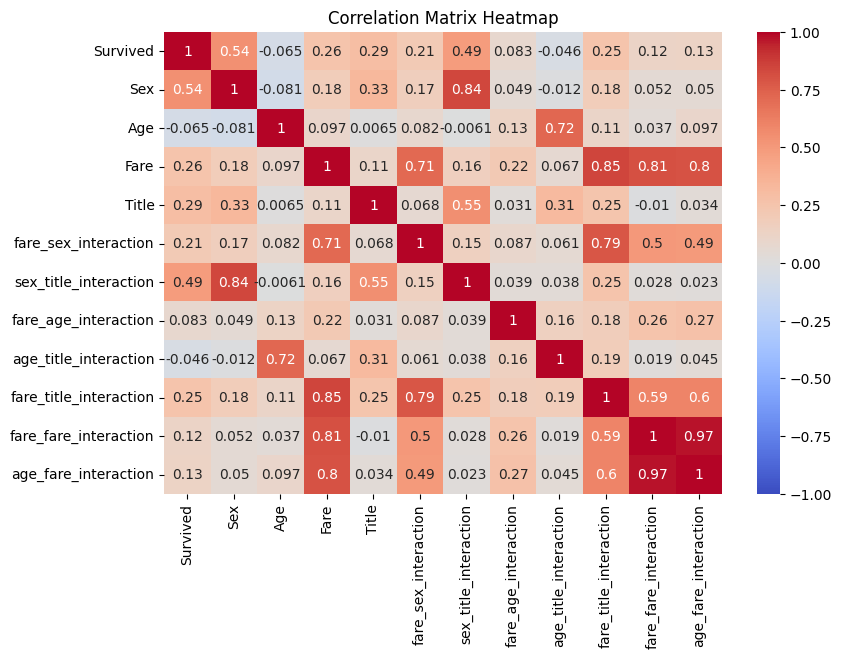

In [825]:
#Select numerical columns
numerical_columns = titanic.select_dtypes(include=['int64', 'float64'])

#Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

#Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

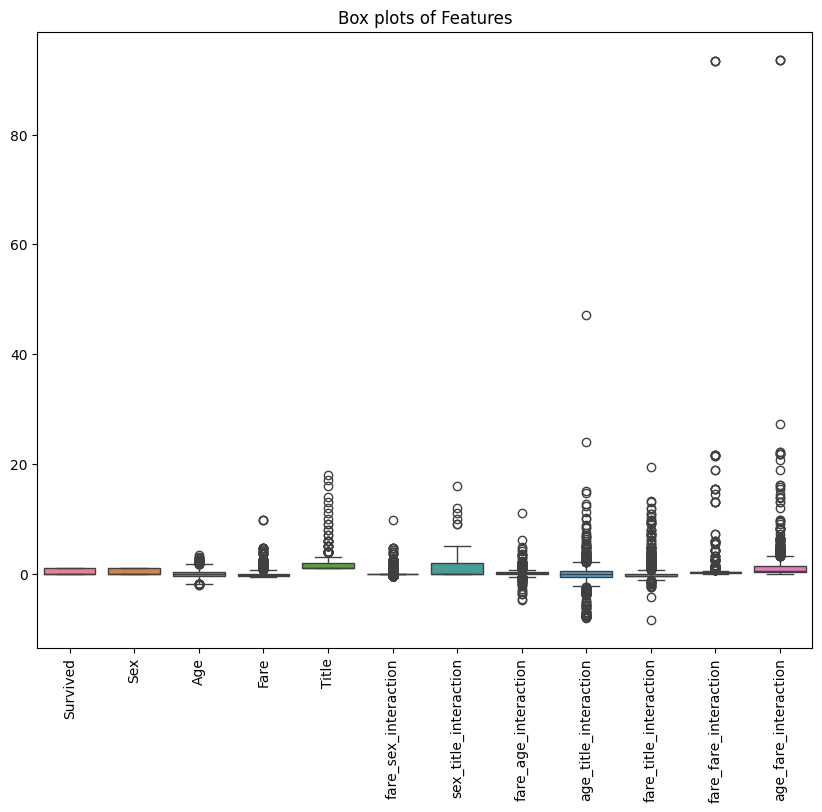

In [826]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=titanic)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

**To remove outliers**

In [828]:
titanic['age_winsorized'] = winsorize(titanic['Age'], limits=[0.05, 0.05])
titanic['Fare_winsorized'] = winsorize(titanic['Fare'], limits=[0.05, 0.05])
titanic['Title_winsorized'] = winsorize(titanic['Title'], limits=[0.05, 0.05])
titanic['fare_sex_winsorized'] = winsorize(titanic['fare_sex_interaction'], limits=[0.05, 0.05])
titanic['sex_title_winsorized'] = winsorize(titanic['sex_title_interaction'], limits=[0.05, 0.05])
titanic['fare_age_winsorized'] = winsorize(titanic['fare_age_interaction'], limits=[0.05, 0.05])
titanic['age_title_winsorized'] = winsorize(titanic['age_title_interaction'], limits=[0.05, 0.05])
titanic['fare_fare_winsorized'] = winsorize(titanic['fare_fare_interaction'], limits=[0.05, 0.05])
titanic['age_fare_winsorized'] = winsorize(titanic['age_fare_interaction'], limits=[0.05, 0.05])
titanic.drop(['Age','Fare','Title', 'fare_sex_interaction', 'sex_title_interaction', 'fare_age_interaction', 'age_title_interaction',
              'fare_fare_interaction','age_fare_interaction'],axis=1, inplace=True)

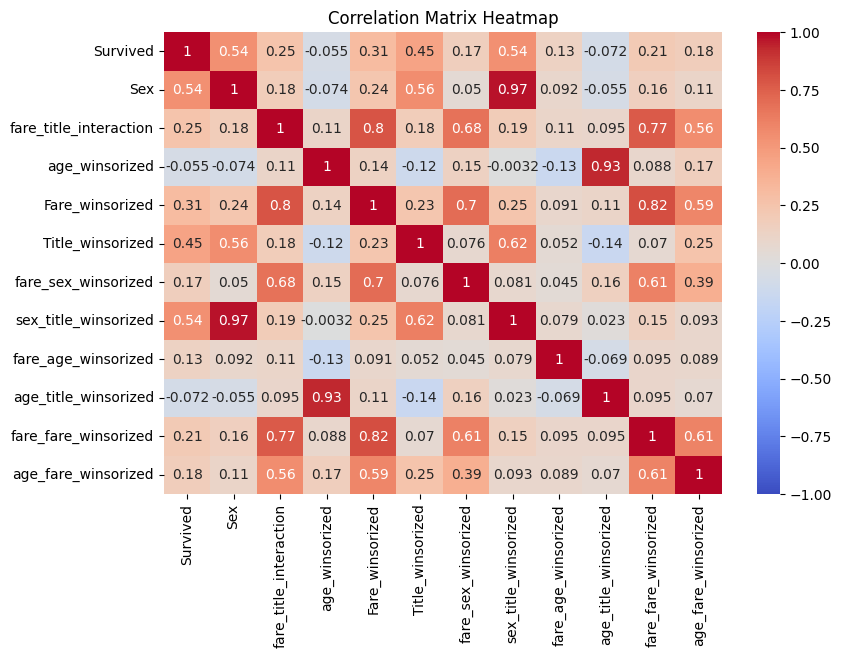

In [829]:
# Select numerical columns
numerical_columns = titanic.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [830]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [831]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print()

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
 [[87 18]
 [21 53]]

--- Decision Tree ---
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.70      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

Confusion Matrix:
 [[81 24]
 [18 56]]

--- K-Nearest Neighbors ---
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73   